## **ANALYSIS OF THE AVIATION DATASET**

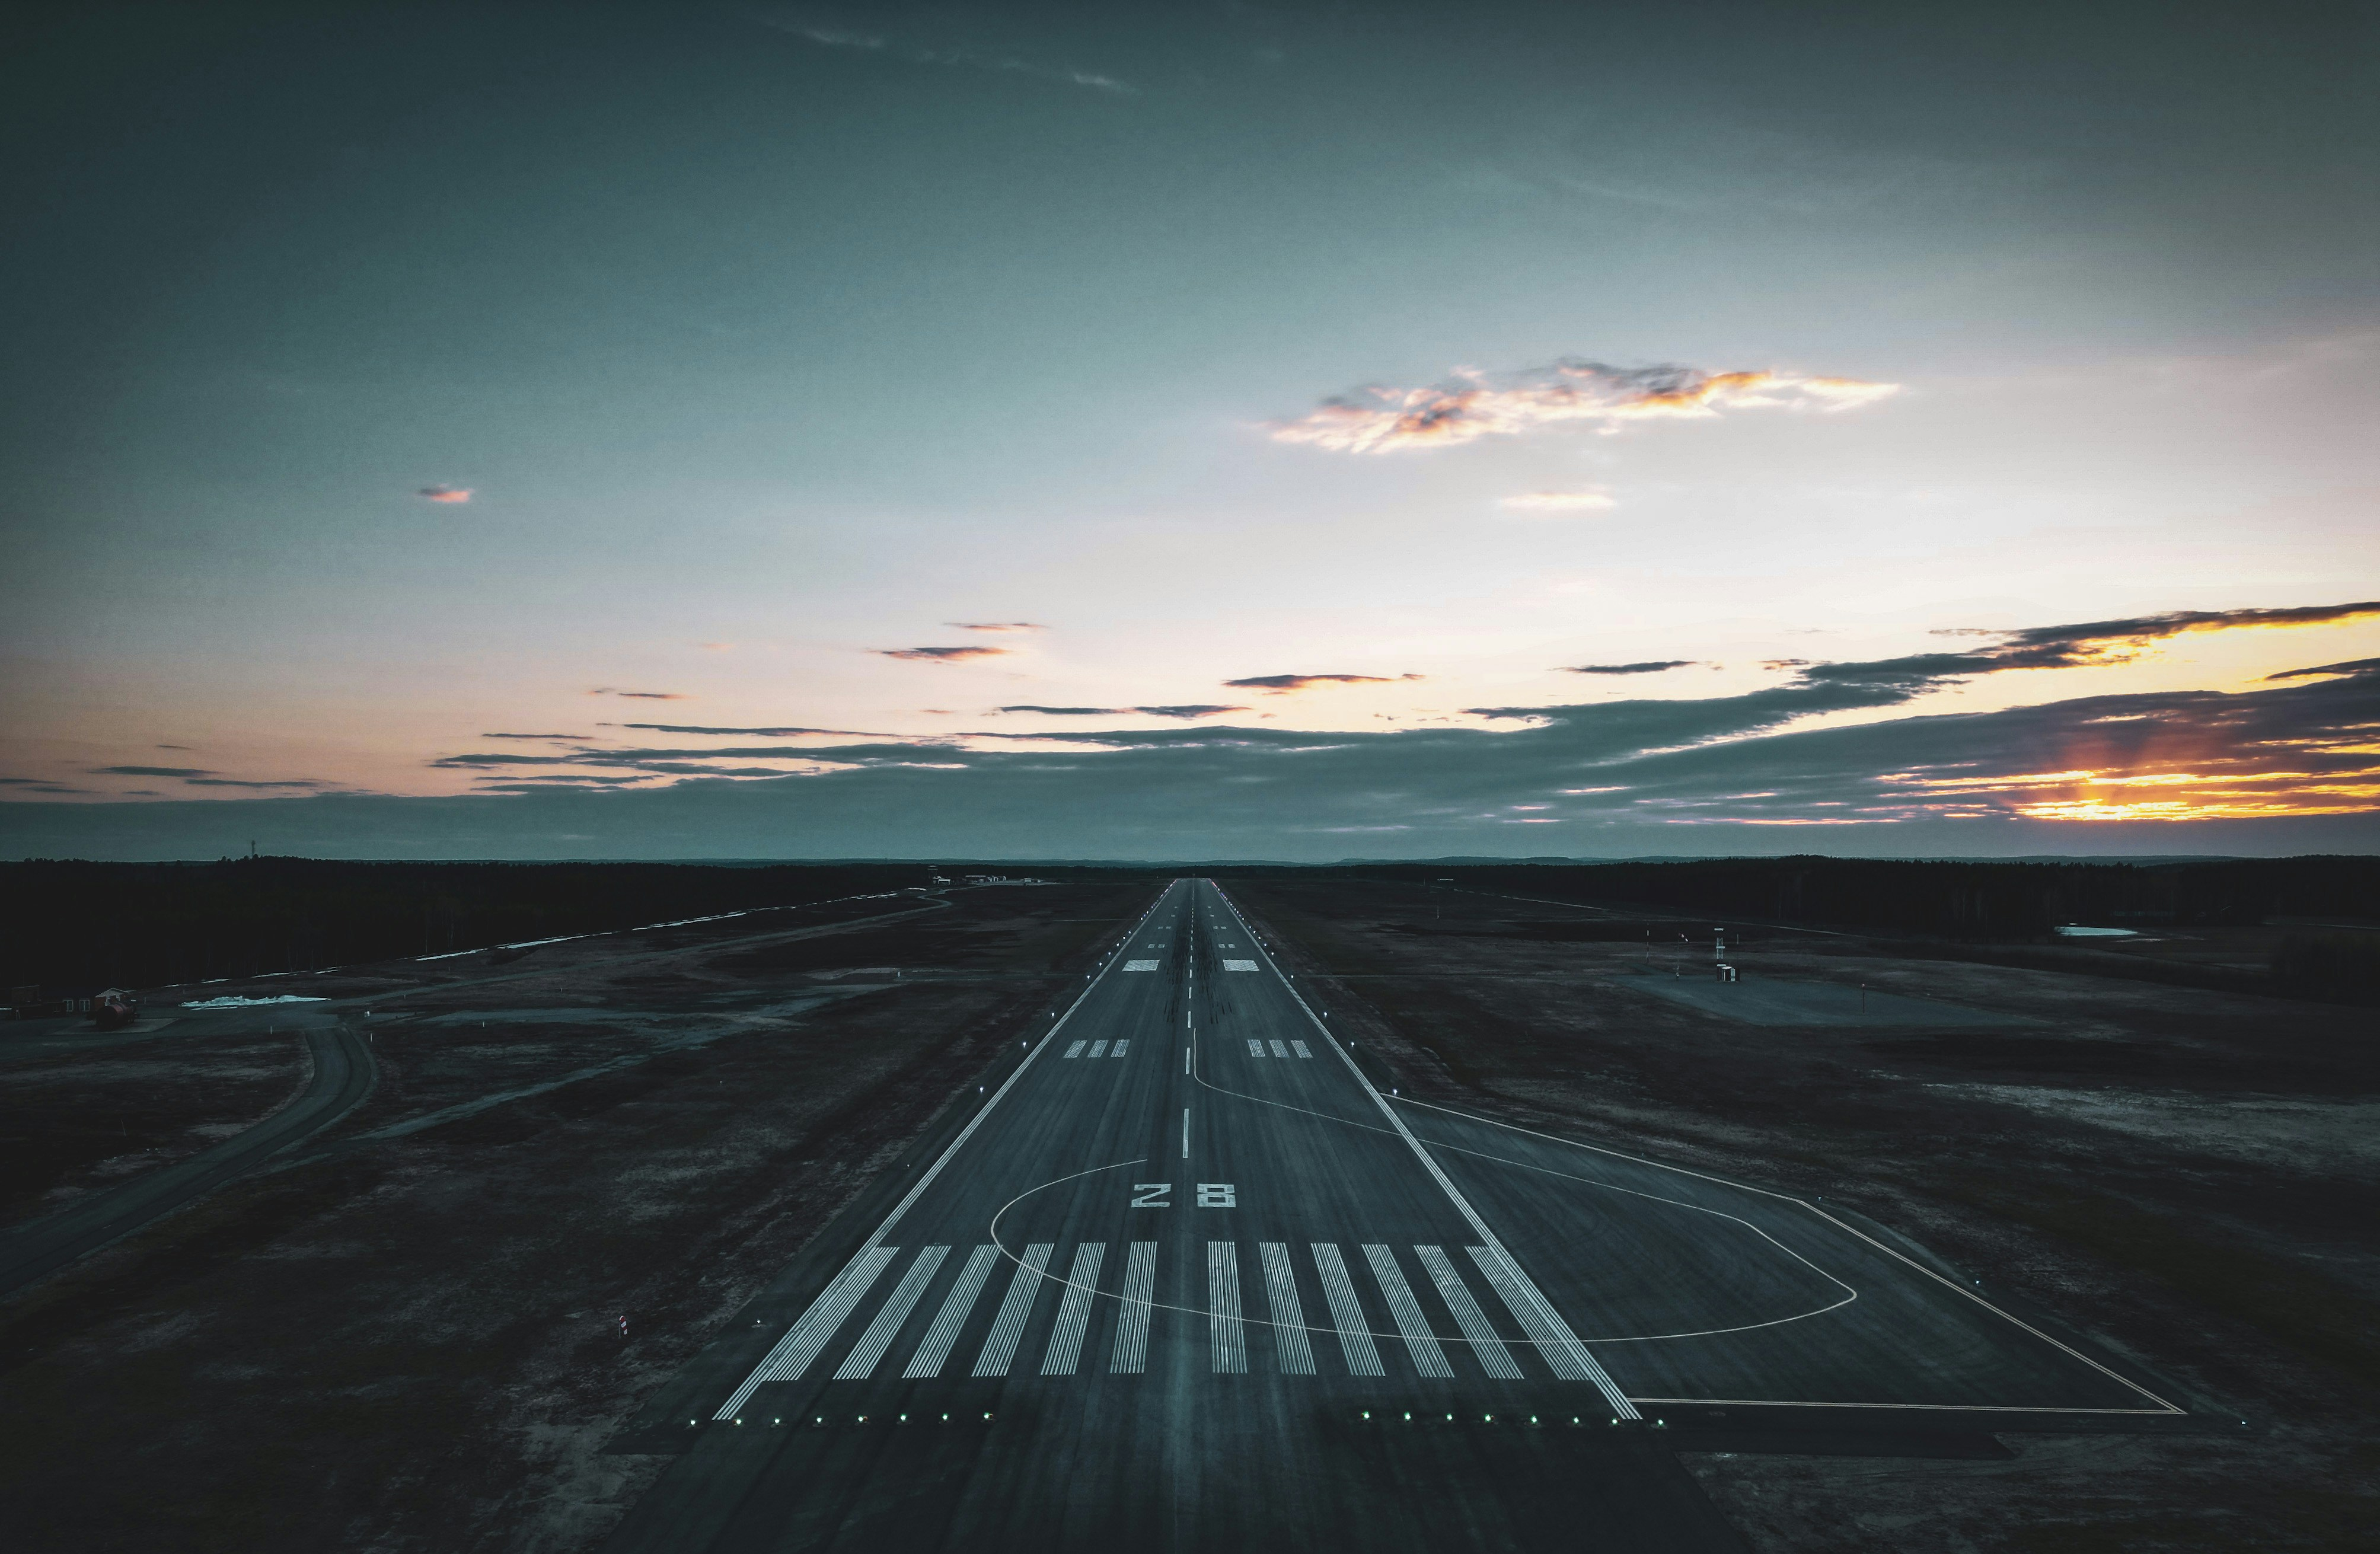

# **Business Problem**

---



Your company is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. You are charged with determining which aircraft are the lowest risk for the company to start this new business endeavor. You must then translate your findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.

# **Importing Necesary Libraries**

---



In [5]:
# importing libraries necessary for analysis and visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Loading Dataset**

---



In [6]:
df = pd.read_csv('Aviation_Data.csv')
df.head()

/tmp/ipython-input-2968550418.py:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Aviation_Data.csv')


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


# **Data Understanding**

---



In [7]:
# checking no. of rows & columns
df.shape

(90348, 31)

In [8]:
# checking data types & missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

our data mainly comprises of types float and object.we have 31 columns and 90348 rows of data,there is a substansial amount of missing data.

In [9]:
# checking the statistical summary
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000




*   **Most people involved are uninjured.**
      - total.uninjured has a median of 1 and a mean of 5.3,indicating that in many incidents occupants survive without injury.
*  **Most incidents involve single-engine aircraft.**
    
*  **Data is highly skewed with extreme ouliers.**

*   **Fatal and serious injuries are uncommon in most records**




# **Data Cleaning**

---



 In this section we are going to check for missing and dupliacted values and drop them.We will also try to do feature engineering.


In [10]:
# Check for duplicated values
df.duplicated().sum()

np.int64(1390)

In [11]:
# Dropping and checking duplicated values

df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

In [12]:
# checking number of missing values
df.isnull().sum()

,0
Event.Id,69
Investigation.Type,0
Accident.Number,69
Event.Date,69
Location,121
Country,295
Latitude,54576
Longitude,54585
Airport.Code,38826
Airport.Name,36254


In [13]:
# dropping rows with unknown values

df = df.dropna(subset=['Air.carrier','Schedule'])

In [14]:
# Standardising the 'Make' column
df['Make'] = df['Make'].apply(lambda x: x.lower().capitalize() if type(x) == str else x)

In [15]:
# replacing 'UNK' with 'UNKOWN'
df['Weather.Condition'] = df['Weather.Condition'].replace('Unk', 'Unknown')


In [16]:
# Filling missing injury counts with o
injury_cols = [
    'Total.Fatal.Injuries',
    'Total.Serious.Injuries',
    'Total.Minor.Injuries',
    'Total.Uninjured'
]

df[injury_cols] = df[injury_cols].fillna(0)


In [18]:
# Converting into date columns
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')
df['Publication.Date'] = pd.to_datetime(df['Publication.Date'], errors='coerce')


/tmp/ipython-input-151283533.py:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Publication.Date'] = pd.to_datetime(df['Publication.Date'], errors='coerce')


In [20]:
# Create Useful features
df['Year'] = df['Event.Date'].dt.year
df['Month'] = df['Event.Date'].dt.month


# **Data Visualisations**

---



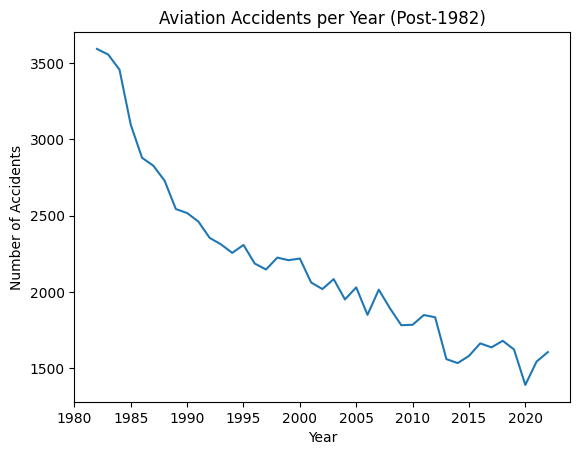

In [21]:
# Accidents Per Year

df = pd.read_csv("Aviation_Data.csv", low_memory=False)

df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')
df['Year'] = df['Event.Date'].dt.year

# Use reliable reporting years
df = df[df['Year'] >= 1982]

accidents_per_year = df['Year'].value_counts().sort_index()

plt.figure()
accidents_per_year.plot()
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.title("Aviation Accidents per Year (Post-1982)")
plt.show()

* Aviation safety improves over time.

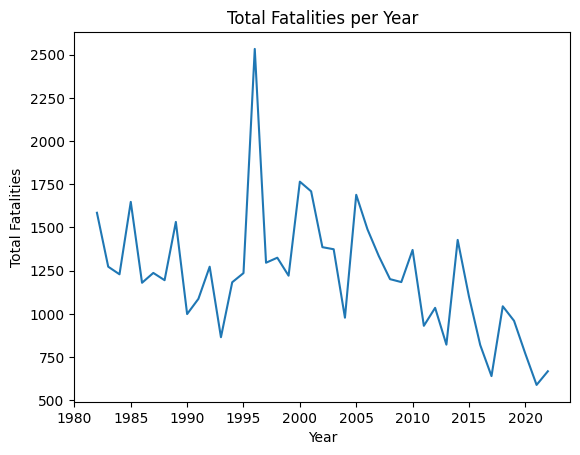

In [22]:
# Fatalities Per Year.

for col in injury_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

fatalities_per_year = df.groupby('Year')['Total.Fatal.Injuries'].sum()

plt.figure()
fatalities_per_year.plot()
plt.xlabel("Year")
plt.ylabel("Total Fatalities")
plt.title("Total Fatalities per Year")
plt.show()

* Few high-fatality events drive most losses-avoid high-speed, complex aircraft early.

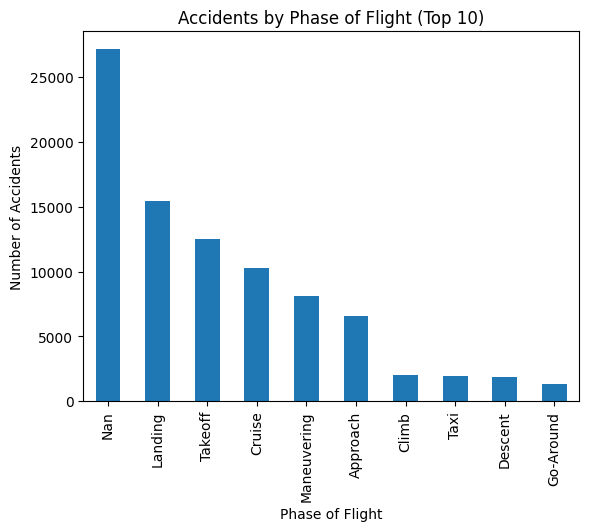

In [23]:
# Accidents by Phase of flight

df['Broad.phase.of.flight'] = (
    df['Broad.phase.of.flight']
    .astype(str)
    .str.strip()
    .str.title()
)

phase_counts = df['Broad.phase.of.flight'].value_counts().head(10)

plt.figure()
phase_counts.plot(kind='bar')
plt.xlabel("Phase of Flight")
plt.ylabel("Number of Accidents")
plt.title("Accidents by Phase of Flight (Top 10)")
plt.show()


* landing,takeoff and approach dominate - choose stable,forgiving aircraft.

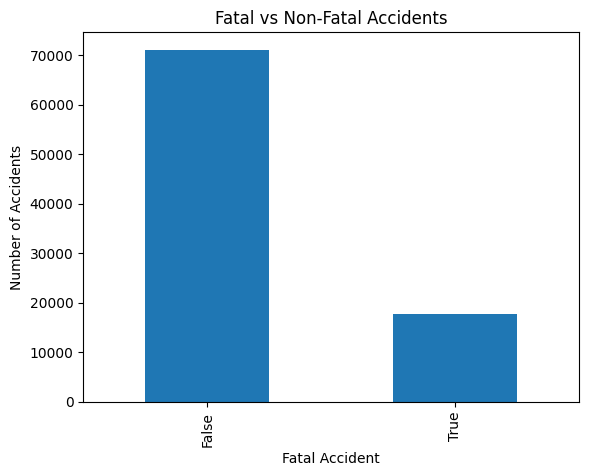

In [24]:
# Fatal vs Non-Fatal aacidents
df['Fatal_Accident'] = df['Total.Fatal.Injuries'] > 0
fatal_split = df['Fatal_Accident'].value_counts()

plt.figure()
fatal_split.plot(kind='bar')
plt.xlabel("Fatal Accident")
plt.ylabel("Number of Accidents")
plt.title("Fatal vs Non-Fatal Accidents")
plt.show()

* Most accidents are survivable - aircraft choice and training reduce downside risk.

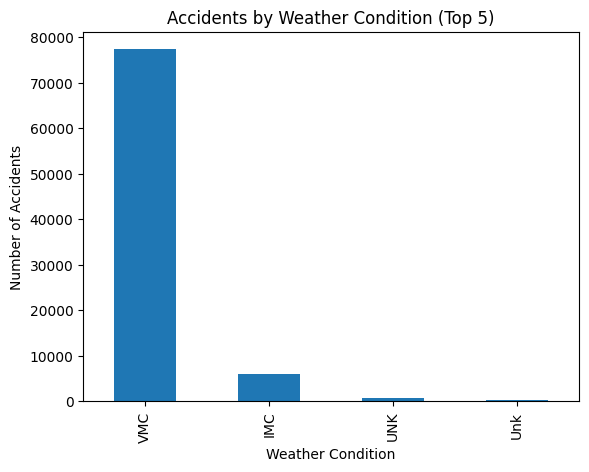

In [25]:
# Weather Conditions.
weather_counts = df['Weather.Condition'].value_counts().head(5)

plt.figure()
weather_counts.plot(kind='bar')
plt.xlabel("Weather Condition")
plt.ylabel("Number of Accidents")
plt.title("Accidents by Weather Condition (Top 5)")
plt.show()

* Risk is driven by aircraft design and human factors, not storms.